Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Изучение данных из файла

Сначала извлечем данные и посмотрим общие параметры.

In [1]:
#импортируем библиотеки
import pandas as pd

from IPython.display import display

import matplotlib.pyplot as plt

from scipy import stats as st
import numpy as np
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

import warnings
warnings.simplefilter('ignore')

data = pd.read_csv('/datasets/games.csv')

display(data.head())
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Изменим столбцы: приведем к нижнему регистру.

In [2]:
data.columns = data.columns.str.lower()
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Теперь прокатимся по каждому столбцу.

In [3]:
#считаем количество уникальных названий игр
print('Количество уникальных названий игр: ', len(data['name'].unique()))

#посмотрим на пропуски, их всего 2:
print('Без названия: ')
data[data['name'].isna()]

Количество уникальных названий игр:  11560
Без названия: 


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Уникальных названий игр 11560, хотя всего в таблице 16713, значит около 5 тысяч дублируются. 
Скорее всего это игры, выпущенные на разные платформы.

2 игры без названия, скорее всего **удалим эти строчки**,  это какой-то артефакт. И очень удачно, что у них же пропуски в жанре.

In [4]:
#перечислим названия игровых платформ
print('Список названий платформ:')
print(data['platform'].unique())
print('Всего: ', len(data['platform'].unique()))


Список названий платформ:
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Всего:  31


Дубликатов в названиях платформ не наблюдается - уже неплохо. 

In [5]:
#проверим год выпуска
print(data['year_of_release'].value_counts())
print(' ')
print('Игр без указания года выпуска: ', data['year_of_release'].isna().sum())

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64
 
Игр без указания года выпуска:  269


С 1980 по 2016. Кстати, тип данных числовой, можно было бы их перевести в дату, но это не требуется - тут используется только год, а месяцы, дни и тд не присутствуют. Плюс здесь 269 игр без указания даты выпуска, посмотрим на них.

In [6]:
data[data['year_of_release'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Обидно, что эти пропуски образовались, и причины сложно понять. Однако жаловаться некому - данные из открытых источников. Можно конечно убить день-другой, заполняя эти пропуски самостоятельно, используя википедию и гугл, или например прпросить стажеров этим заняться. Но ни того, ни другого у нас нет. 

Тогда можно например **найти эти игры на других платформах и взять дату выхода оттуда** (у нас ведь есть дубликаты в названии), т.к. разработчики игр обычно релизят игру на несколько платформ.

In [7]:
#посмотри на жанры
print(data['genre'].value_counts())

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64


В жанрах все ок, но приведем значения **в нижний регистр** для удобства. А 2 пропуска мы уже нашли выше.

In [8]:
#посмотрим на цифры в проданных копиях
sales = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
for sale in sales:
    display(sale)
    display(data[sale].describe())

'na_sales'

count    16715.000000
mean         0.263377
std          0.813604
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

'eu_sales'

count    16715.000000
mean         0.145060
std          0.503339
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

'jp_sales'

count    16715.000000
mean         0.077617
std          0.308853
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

'other_sales'

count    16715.000000
mean         0.047342
std          0.186731
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

В данных о продажах пропусков нет, выбросов тоже не наблюдаем: максимум в США 41млн, в Европе 29, в Японии и Других регионах примерно по 10. В принципе, цифры реалистичные, и тут же можно сделать не вывод, а хотя бы увидеть первый знак о различии объема/возможностей этих рынков. 

По средним/медианным значениям судить на данном этапе сложно, потому что скорее всего они утонули из-за мизерных значений тех периодов, когда рынок еще не был таким как сейчас.

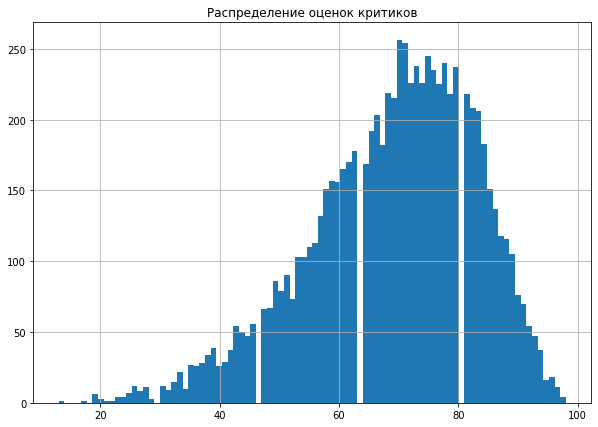

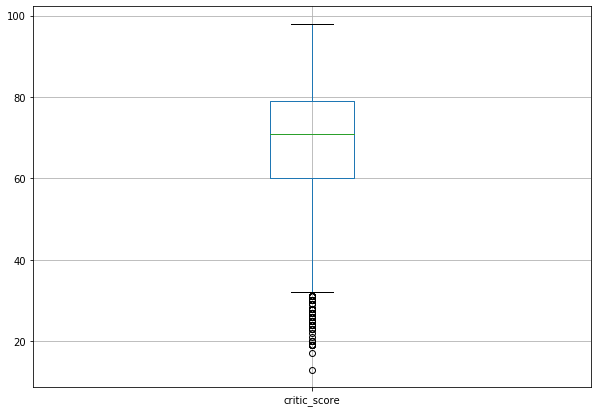

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [9]:
#теперь посмотрим на оценки критиков
plt.figure(figsize=(10,7))
plt.title('Распределение оценок критиков')
data['critic_score'].hist(bins=90)
plt.show()

plt.figure(figsize=(10,7))
data.boxplot(column='critic_score')
plt.show()

data['critic_score'].describe()

График скоше чуть влево, это в принципе логично, ведь завоевать высокую оценку очень сложно, а низкую оценку схватить наоборот легко. 

Пропусков здесь практически в половине строк, что верояно обусловлено тем фактом, что система рейтингов появилась не сразу, и наверное выделять актуальный период стоит, основываясь на этих данных. В любом случае, эти пропуски заполнять статистическими методами не стоит, и смотреть на рейтинг игры на другой платформе тоже будет неправильно, т.к. игра может отличаться и критик все-таки давал ей оценку на конкретной платформе.

 Графики для пользовательских оценок не строятся из-за ошибки, посмотрим на значения в столбце.

In [11]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Обнаруживаем, что в массиве есть значения tbd, что значит To Be Determined или Еще не определено. Посмотрим сколько их.

In [12]:
display(len(data.query('user_score == "tbd"')))


2424

2424 строчки, может это игры этого года, которым еще не поставили оценку?

In [13]:
display(data.query('user_score == "tbd"')['year_of_release'].value_counts())
data.query('user_score == "tbd"').head(10)

2009.0    405
2010.0    331
2008.0    326
2011.0    217
2002.0    192
2007.0    192
2006.0    124
2005.0    121
2004.0    107
2003.0     95
2001.0     82
2000.0     43
2015.0     38
2016.0     34
2012.0     24
2014.0     21
2013.0     15
1999.0      8
1997.0      1
Name: year_of_release, dtype: int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009.0,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004.0,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999.0,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001.0,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E


 А вот и нет. Поэтому это скорее всего значит, что у игры не сформировался рейтинг, например из-за маленького числа поставленных оценок. Значит **эти данные надо убрать, переведя в пропуск**, чтобы они не мешали расчетам.

In [14]:
#теперь посмотрим значения в столбце реитинга есрб
display(data['rating'].unique())

#+ сколько пропусков
data['rating'].isna().sum()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

6766

Видим, что здесь присутсвует старое название рейтинга Everyone: K-A, т.е. Kids-Adults, которое было до 1998 года, его стоит **привести в современный формат**. 

Ну а пропуски видимо у тех игр, которые были выпущены до основания Ассоциации, то есть до 1994 года, проверим.

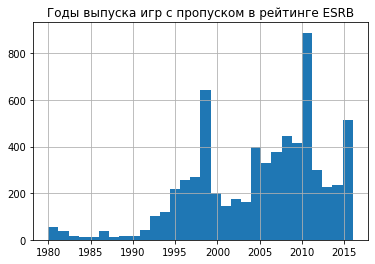

In [15]:
plt.title('Годы выпуска игр с пропуском в рейтинге ESRB')
data[data['rating'].isna()]['year_of_release'].hist(bins=30)
plt.show()

Опять мимо! Наоборот для игр старше 1994 года больше всего пропусков здесь. Также попробуем **найти рейтинг по уникальному названию игры**, других вариантов нет.

Аккумулируем полученую информацию, и что необходимо сделать:
- удалить 2 строчки с пропуском года выпуска и жанра
- заменить рейтинг K-A современным Е
- попробовать заменить пропуски в дате выхода и рейтинг ESRB, найдя эти данные в других строчках с этой же игрой
- название жанров в нижний регистр
- заменить tbd на Nan и установить числовой тип в столбце Пользовательской оценки

## Подготовка данных

Помимо действий по предобработке добавим новый столбец с суммой продаж во всех регионах.

In [16]:
#удалим 2 сточки
wrong_data = data[data['name'].isna()].index
data = data.drop(wrong_data)
print('Количество уникальных названий игр: ', len(data['name'].unique()))

Количество уникальных названий игр:  11559


In [17]:
#заменим старый рейтинг на новый
data['rating'] = data['rating'].replace('K-A', 'E')
display(data['rating'].unique())

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [18]:
#приведем название жанров в нижний регистр
data['genre'] = data['genre'].str.lower()
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Теперь займемся пропусками в Годе выпуска

In [19]:
#сделаем словарь, где будет выведен синтетический год выхода для каждой уникальной игры year_agg
name_grouped = data.pivot_table(index='name', values='year_of_release')
name_grouped.columns=['year_agg']
name_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11426 entries,  Beyblade Burst to ¡Shin Chan Flipa en colores!
Data columns (total 1 columns):
year_agg    11426 non-null float64
dtypes: float64(1)
memory usage: 178.5+ KB


У нас 11559 уникальных игр, и для 11426 из них есть дата выпуска, то есть для 133 игр в принципе неизвестна дата выхода. Эти строчки смело можно потереть (они не несут никакой смысловой нагрузки) и посмотреть, что осталось.

In [20]:
#сначала прицепим к датасету столбец со средней датой выхода, пока не обращаем внимание на нецелые значения
data = data.merge(name_grouped, on=['name'], how='left')
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_agg
183,Madden NFL 2004,PS2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E,2003.000000
377,FIFA Soccer 2004,PS2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,E,2003.000000
456,LEGO Batman: The Videogame,Wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,2008.000000
475,wwe Smackdown vs. Raw 2006,PS2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,NaN
609,Space Invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,1998.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+,2008.000000
16403,Freaky Flyers,GC,NaN,racing,0.01,0.00,0.00,0.00,69.0,6.5,T,2003.000000
16446,Inversion,PC,NaN,shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,2012.000000
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN


In [21]:
#убираем строки, где нигде нет года выпуска

data.dropna(subset = ['year_agg'], inplace = True)

#проверим, должно остаться 11426 штук
print('Количество уникальных названий игр: ', len(data['name'].unique()))

Количество уникальных названий игр:  11426


Промежуточный успех. Теперь посмотрим на уникальные значения в синтетическом годе выпуска для строк, где изначально его не было. Если эти значения не целые, значит в исходнике для этих игр были разные года выпуска для разных платформ, и их надо посмотреть вблизи. 

In [22]:
data[data['year_of_release'].isna()]['year_agg'].unique()

array([2003.        , 2008.        , 1998.33333333, 2006.        ,
       2010.        , 2012.        , 2002.        , 2002.5       ,
       2003.75      , 2001.33333333, 2011.        , 2008.25      ,
       2005.        , 2007.        , 2001.        , 2004.        ,
       2009.        , 2013.5       , 2005.5       , 2013.        ,
       1999.        , 2001.5       , 2003.33333333])

In [23]:
shityear = [2002.5, 2008.25, 2003.75, 2001.33333333, 2013.5, 2001.5, 1998.3333333333333, 2005.5, 2003.3333333333333]
data[data['year_of_release'].isna()].query('year_agg in @shityear')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_agg
609,Space Invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,1998.333333
1698,Hitman 2: Silent Assassin,XB,NaN,action,0.76,0.38,0.00,0.05,84.0,8,M,2002.500000
2156,Wheel of Fortune,PS2,NaN,misc,0.47,0.36,0.00,0.12,NaN,tbd,E,2003.750000
2571,PES 2009: Pro Evolution Soccer,PSP,NaN,sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN,2008.250000
5335,Tomb Raider (2013),PC,NaN,action,0.06,0.25,0.00,0.04,86.0,8.5,M,2013.500000
6623,College Hoops 2K6,PS2,NaN,sports,0.12,0.10,0.00,0.03,77.0,7.3,E,2005.500000
12216,Rayman Arena,XB,NaN,racing,0.05,0.01,0.00,0.00,50.0,tbd,E,2001.500000
14747,Tom and Jerry in War of the Whiskers,XB,NaN,fighting,0.02,0.01,0.00,0.00,NaN,NaN,NaN,2002.500000
15336,Mario Tennis,3DS,NaN,sports,0.00,0.00,0.02,0.00,NaN,NaN,NaN,2003.333333


Нашли 9 игр, для которых так просто не установить год выпуска. Их не так много, поэтому посмотрим в википедии.

In [24]:
data.loc[609, 'year_of_release'] = 1980
data.loc[1698, 'year_of_release'] = 2002
data.loc[2156, 'year_of_release'] = 2003
data.loc[2571, 'year_of_release'] = 2008
data.loc[5335, 'year_of_release'] = 2013
data.loc[6623, 'year_of_release'] = 2005
data.loc[12216, 'year_of_release'] = 2002
data.loc[14747, 'year_of_release'] = 2003
data.loc[15336, 'year_of_release'] = 2014

В остальных строках просто перенесем год.

In [25]:
print ('Пропуски до: ', data['year_of_release'].isna().sum())

data.loc[data['year_of_release'].isna(), 'year_of_release'] = data['year_agg']

print ('Пропуски после: ', data['year_of_release'].isna().sum())

Пропуски до:  114
Пропуски после:  0


Было непросто, теперь то же самое проделаем с рейтингом ESRB.

In [26]:
#сделаем словарь esrb_grouped, где будет выведен рейтинг esrb для каждой уникальной игры
esrb_grouped = data.sort_values(by='name')

#сразу уберем строки с пропусками
esrb_grouped.dropna(subset = ['rating'], inplace = True)

esrb_grouped

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_agg
2453,Tales of Xillia 2,PS3,2012.0,role-playing,0.20,0.12,0.45,0.07,71.0,7.9,T,2012.0
1560,.hack//Infection Part 1,PS2,2002.0,role-playing,0.49,0.38,0.26,0.13,75.0,8.5,T,2002.0
2989,.hack//Mutation Part 2,PS2,2002.0,role-playing,0.23,0.18,0.20,0.06,76.0,8.9,T,2002.0
4264,.hack//Outbreak Part 3,PS2,2002.0,role-playing,0.14,0.11,0.17,0.04,70.0,8.7,T,2002.0
3756,007 Racing,PS,2000.0,racing,0.30,0.20,0.00,0.03,51.0,4.6,T,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14451,thinkSMART FAMILY!,Wii,2010.0,misc,0.03,0.00,0.00,0.00,NaN,tbd,E,2010.0
16492,thinkSMART: Chess for Kids,DS,2011.0,misc,0.01,0.00,0.00,0.00,NaN,tbd,E,2011.0
645,uDraw Studio,Wii,2010.0,misc,1.65,0.57,0.00,0.20,71.0,tbd,E,2010.0
8279,uDraw Studio: Instant Artist,Wii,2011.0,misc,0.06,0.09,0.00,0.02,NaN,tbd,E,2011.0


In [27]:
#удалим дубликаты в названиях
esrb_grouped = esrb_grouped.drop_duplicates(subset='name').reset_index(drop = True)
esrb_grouped

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_agg
0,Tales of Xillia 2,PS3,2012.0,role-playing,0.20,0.12,0.45,0.07,71.0,7.9,T,2012.0
1,.hack//Infection Part 1,PS2,2002.0,role-playing,0.49,0.38,0.26,0.13,75.0,8.5,T,2002.0
2,.hack//Mutation Part 2,PS2,2002.0,role-playing,0.23,0.18,0.20,0.06,76.0,8.9,T,2002.0
3,.hack//Outbreak Part 3,PS2,2002.0,role-playing,0.14,0.11,0.17,0.04,70.0,8.7,T,2002.0
4,007 Racing,PS,2000.0,racing,0.30,0.20,0.00,0.03,51.0,4.6,T,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5993,thinkSMART,DS,2010.0,misc,0.09,0.00,0.00,0.01,NaN,tbd,E,2010.0
5994,thinkSMART FAMILY!,Wii,2010.0,misc,0.03,0.00,0.00,0.00,NaN,tbd,E,2010.0
5995,thinkSMART: Chess for Kids,DS,2011.0,misc,0.01,0.00,0.00,0.00,NaN,tbd,E,2011.0
5996,uDraw Studio,Wii,2010.0,misc,1.65,0.57,0.00,0.20,71.0,tbd,E,2010.0


In [28]:
#оставим в таблице только названия и рейтинг
esrb_grouped = esrb_grouped[['name','rating']]
esrb_grouped.columns=['name','rating_agg']
esrb_grouped

,name,rating_agg
0,Tales of Xillia 2,T
1,.hack//Infection Part 1,T
2,.hack//Mutation Part 2,T
3,.hack//Outbreak Part 3,T
4,007 Racing,T
...,...,...
5993,thinkSMART,E
5994,thinkSMART FAMILY!,E
5995,thinkSMART: Chess for Kids,E
5996,uDraw Studio,E


Получили словарь с рейтингом, результат негустой - всего 6 тысяч игр из 11,5 имеют рейтинг. Прицепим его к исходнику.

In [29]:
data = data.merge(esrb_grouped, on=['name'], how='left')
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_agg,rating_agg
0,Wii Sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E,2006.0,E
1,Super Mario Bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1992.0,NaN
2,Mario Kart Wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,2008.0,E
3,Wii Sports Resort,Wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E,2009.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,1996.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16562,Samurai Warriors: Sanada Maru,PS3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,2016.0,NaN
16563,LMA Manager 2007,X360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,2006.0,NaN
16564,Haitaka no Psychedelica,PSV,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,2016.0,NaN
16565,Spirits & Spells,GBA,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,2003.0,NaN


In [30]:
print ('Пропуски до: ', data['rating'].isna().sum())

data.loc[data['rating'].isna(), 'rating'] = data['rating_agg']

print ('Пропуски после: ', data['rating'].isna().sum())

Пропуски до:  6699
Пропуски после:  6262


Результат получился скромный, но хоть какой-то: заполнили 437 пропусков. А остальные не трогаем, к сожалению данные из открытых источников имеют свои недостатки.

Теперь заменим tbd на Nan

In [31]:
#заодно удалим ненужные столбцы
data.drop(['year_agg','rating_agg'], axis=1, inplace=True)

#делаем замену + переведем столбец в тип числовой тип Float
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'] = pd.to_numeric(data['user_score'])

#проверка
print(data['user_score'].unique())
data.info()

[8.  nan 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 7.5 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8
 6.9 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5
 4.4 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5
 2.1 3.6 2.8 1.8 3.8 0.  1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5 1.3
 0.2 0.6 1.4 0.9 1.  9.7]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16566
Data columns (total 11 columns):
name               16567 non-null object
platform           16567 non-null object
year_of_release    16567 non-null float64
genre              16567 non-null object
na_sales           16567 non-null float64
eu_sales           16567 non-null float64
jp_sales           16567 non-null float64
other_sales        16567 non-null float64
critic_score       8075 non-null float64
user_score         7540 non-null float64
rating             10305 non-null object
dtypes: float64(7), object(4)
memory usage: 

И последнее в предобработке: новый столбец с суммой продаж по регионам.

In [32]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

#дополнительно заменим пропуски, чтобы потом корректно проводились математические вычисления
#data['critic_score'] = data['critic_score'].fillna('')
#data['critic_score'] = pd.to_numeric(data['critic_score'])

#data['user_score'] = data['user_score'].fillna('')
#data['user_score'] = pd.to_numeric(data['user_score'])

#data['rating'] = data['rating'].fillna('')

display(data.head())
data.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16566
Data columns (total 12 columns):
name               16567 non-null object
platform           16567 non-null object
year_of_release    16567 non-null float64
genre              16567 non-null object
na_sales           16567 non-null float64
eu_sales           16567 non-null float64
jp_sales           16567 non-null float64
other_sales        16567 non-null float64
critic_score       8075 non-null float64
user_score         7540 non-null float64
rating             10305 non-null object
total_sales        16567 non-null float64
dtypes: float64(8), object(4)
memory usage: 2.3+ MB


Промежуточный вывод после предобработки - качество исходника оставляет желать лучшего. Очень много пропущенных значений, с которыми практически ничего не сделать, придется проводить анализ из того, что есть.

## Исследовательский анализ данных

В этом разделе следующие задачи:
- Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Взять данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывать в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулировать выводы.
- Соотнести выводы с продажами игр на других платформах.
- Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Построим гистограмму, чтобы увидеть сколько игр выпускалось за разные годы.

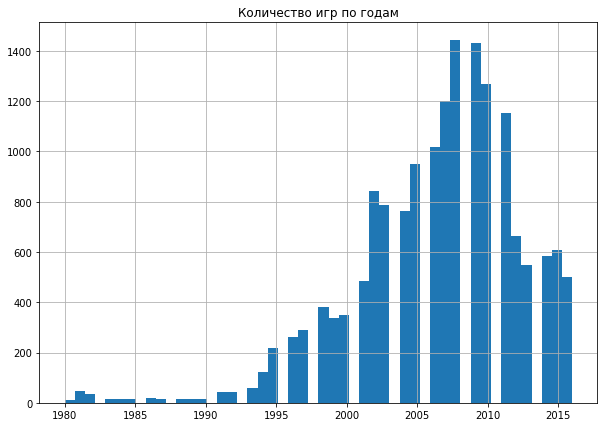

count    16567.000000
mean      2006.489729
std          5.866150
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [33]:
plt.figure(figsize=(10,7))
plt.title('Количество игр по годам')
data['year_of_release'].hist(bins=50)
plt.show()
data['year_of_release'].describe()

Очевидно, что игры, выпущенные до 2000 года, не сильно важны для нас - их выходило очень мало да и в принципе это уже история.

Теперь изучим продажи для каждой платформы в ретроспективе.

In [34]:
#сделаем сводную с объемом ежегодных продаж
platform_sales = data.pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc='sum')
platform_sales.columns=['total_sales']
platform_sales = platform_sales.reset_index()
platform_sales

,platform,year_of_release,total_sales
0,2600,1980.0,13.91
1,2600,1981.0,35.68
2,2600,1982.0,28.88
3,2600,1983.0,5.84
4,2600,1984.0,0.27
...,...,...,...
238,XB,2008.0,0.18
239,XOne,2013.0,18.96
240,XOne,2014.0,54.07
241,XOne,2015.0,60.14


Теперь выделим из них самые прибыльные.

In [35]:
platform_top_sales = data.pivot_table(index=['platform'], values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending = False)
platform_top_sales

,total_sales
platform,
PS2,1247.16
X360,966.61
PS3,935.19
Wii,903.31
DS,804.28
PS,727.58
PS4,314.14
GBA,313.73
PSP,293.57


Оптимально будет выделить первые 20 из списка, то есть с продажами свыше 50 млн.

In [36]:
platform_top_sales = platform_top_sales.query('total_sales>50').reset_index()
platform_top_sales = platform_top_sales['platform']
platform_top_sales

0      PS2
1     X360
2      PS3
3      Wii
4       DS
5       PS
6      PS4
7      GBA
8      PSP
9       PC
10     3DS
11      XB
12      GB
13     NES
14     N64
15    SNES
16      GC
17    XOne
18    2600
19    WiiU
20     PSV
Name: platform, dtype: object

In [37]:
#ограничим выборку нашими 15ю платформами
platform_sales = platform_sales.query ('platform in @platform_top_sales')
platform_sales

,platform,year_of_release,total_sales
0,2600,1980.0,13.91
1,2600,1981.0,35.68
2,2600,1982.0,28.88
3,2600,1983.0,5.84
4,2600,1984.0,0.27
...,...,...,...
238,XB,2008.0,0.18
239,XOne,2013.0,18.96
240,XOne,2014.0,54.07
241,XOne,2015.0,60.14


<Figure size 576x360 with 0 Axes>

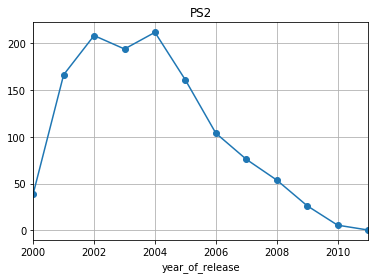

<Figure size 576x360 with 0 Axes>

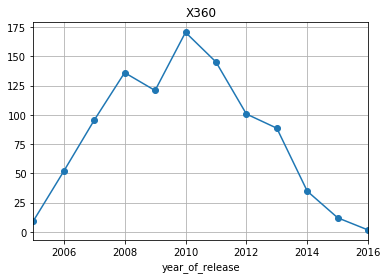

<Figure size 576x360 with 0 Axes>

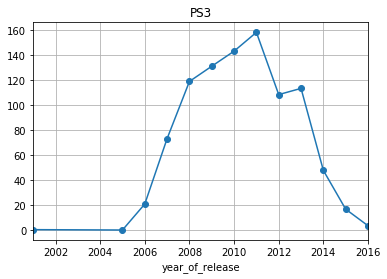

<Figure size 576x360 with 0 Axes>

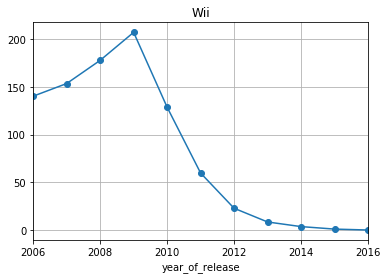

<Figure size 576x360 with 0 Axes>

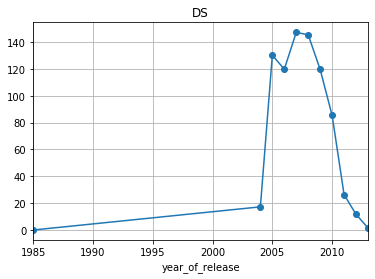

<Figure size 576x360 with 0 Axes>

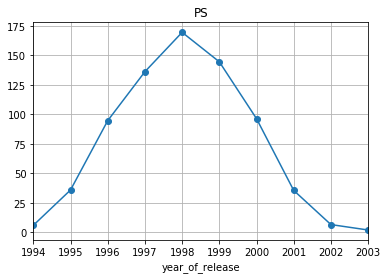

<Figure size 576x360 with 0 Axes>

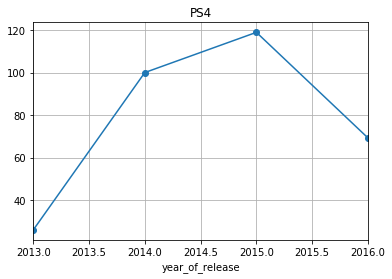

<Figure size 576x360 with 0 Axes>

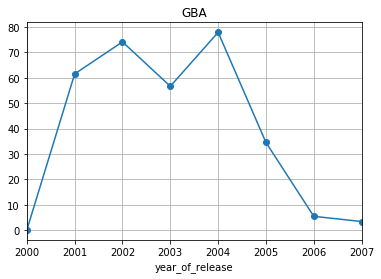

<Figure size 576x360 with 0 Axes>

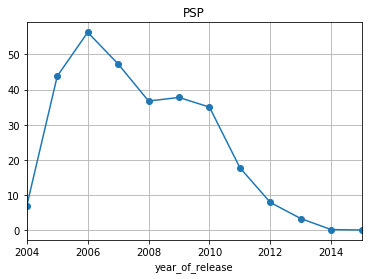

<Figure size 576x360 with 0 Axes>

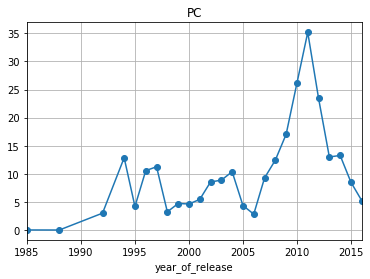

<Figure size 576x360 with 0 Axes>

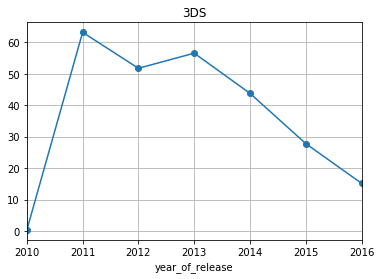

<Figure size 576x360 with 0 Axes>

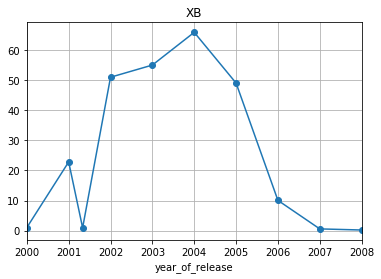

<Figure size 576x360 with 0 Axes>

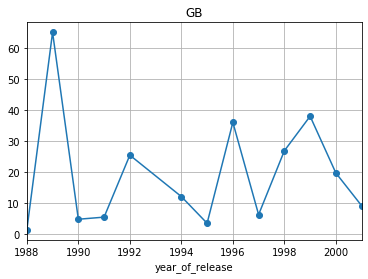

<Figure size 576x360 with 0 Axes>

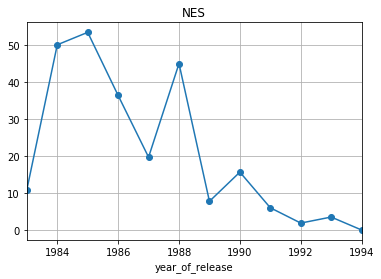

<Figure size 576x360 with 0 Axes>

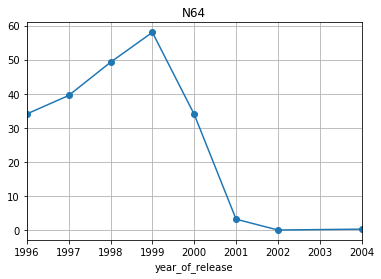

<Figure size 576x360 with 0 Axes>

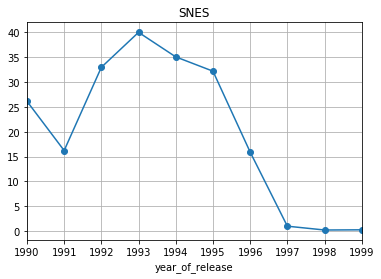

<Figure size 576x360 with 0 Axes>

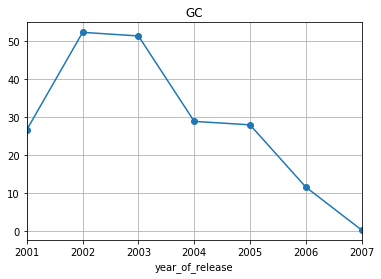

<Figure size 576x360 with 0 Axes>

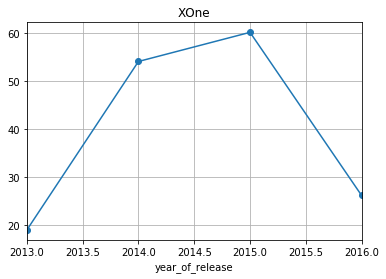

<Figure size 576x360 with 0 Axes>

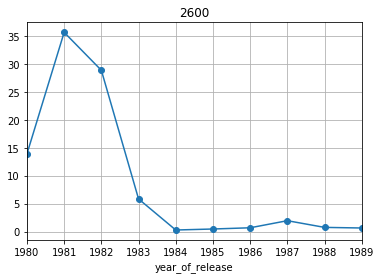

<Figure size 576x360 with 0 Axes>

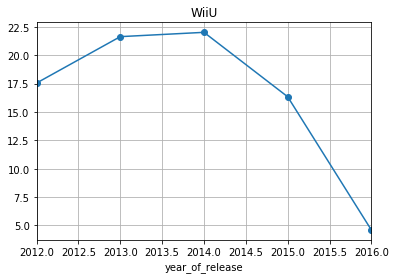

<Figure size 576x360 with 0 Axes>

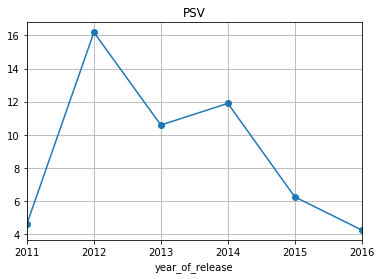

In [38]:
for col in platform_top_sales:
    plt.figure(figsize=(8,5))
    platform_sales[platform_sales['platform'] == col].plot(x='year_of_release', y='total_sales', style='o-', title=col, grid=True, legend=False)
    plt.show()

По графикам заметно, что в среднем жизненный цикл успешной консоли (за исключением ПК) составляет 10 лет.
Из актуальных платформ XB, PS2, PS3 и Wii находятся на излете своего существования, 3DS и PC идут в пике. Некстгены PS4, XOne и WiiU находятся на рынке по 3-4 года, но все в 2016 году показали синхронный спад продаж.

За актуальный период возьмем промежуток последние 10 лет: с 2006 по 2016. Там достаточная выборка по количеству игр, и она захватывает не только последнее поколение консолей, но и историческое развитие основных платформ. Выделим для анализа отдельную таблицу act_data.

In [39]:
act_data = data.query('year_of_release >= 2006')

#переназначим таблицу platform_sales с актуальными данными
platform_top_sales = act_data.pivot_table(index=['platform'], values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending = False)
platform_top_sales

,total_sales
platform,
X360,957.39
PS3,934.52
Wii,903.31
DS,656.85
PS4,314.14
PS2,266.48
3DS,258.53
PSP,242.67
PC,166.46


Дополнительно уберем последние 4 платформы из-за их незначительных объемов продаж в актуальном периоде.

In [40]:
low_sales = ['GC', 'XB', 'GBA', 'DC']
act_data = act_data.query('platform !=@low_sales')
act_data['platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS4', '3DS', 'PC', 'XOne', 'WiiU',
       'PS2', 'PSP', 'PSV'], dtype=object)

<Figure size 7200x7200 with 0 Axes>

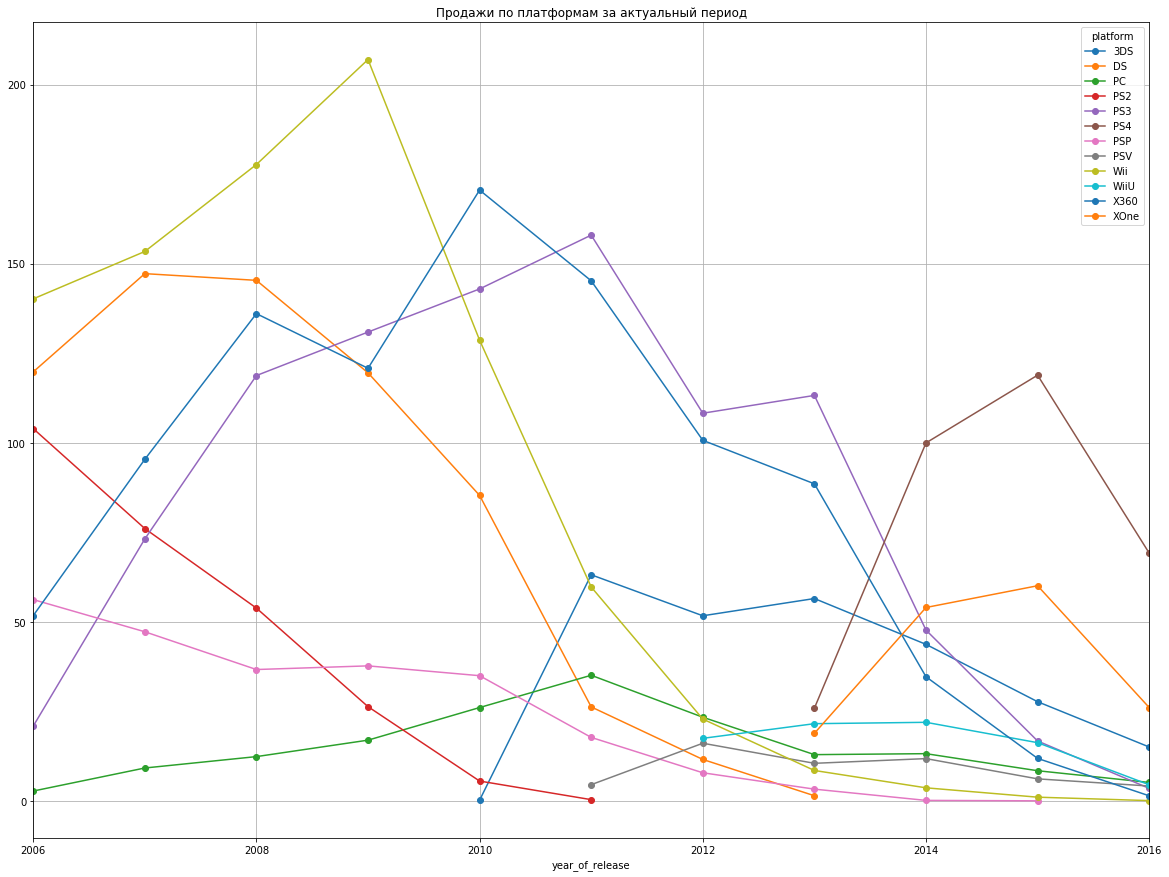

In [41]:
#переназначим таблицу с продажами с актуальными данными
platform_sales = act_data.pivot_table(index=['platform','year_of_release'], values='total_sales', aggfunc='sum')
platform_sales.columns=['total_sales']
platform_sales = platform_sales.reset_index()

#построим график со всеми консолями
plt.figure(figsize=(100,100))
pd.pivot_table(data=platform_sales, values='total_sales',columns='platform',index='year_of_release').plot(figsize=(20,15), style='o-', title='Продажи по платформам за актуальный период', grid=True)
plt.show()

За актуальный период в топ5 по продажам входят:
- X360 872млн
- WII 824млн
- PS3 799млн
- DS 609млн
- PS4 265млн

Но графики снова подтверждают, что большинство платформ уже практически потеряли свои потенциал, и на рынке самыми перспективными являются некстген-консоли: **PS4 и Xone**. Предыдущие их поколения, PS3 и X360, шли ноздря в ноздрю и достигали отличных объемов продаж, а некстгены стартовали в 2013-2014гг и тоже показывают отностительно хороший рост, причем PS4 уже ворвалась в топ5, что может говорить о том, что это самая перспективная платформа. Она показала аналогичную динамику за первые 3 года существования, как и ее предшественница PS3, но на 4 год (в 2016) случился некий глобальный кризис, который обвалил весь рынок. 

PSV тоже относительно нестарая платформа, но она за 6 лет так и не смогла приблизиться к результатам предшественницы PSP, поэтому перспективной ее считать нельзя.

X360 находится на 3м месте, но записывать ее в перспективные тоже нельзя: она пережила свой пик в 2011-2013гг и сейчас идет на спад, тем более, что ее уже 3 последних года обгоняет некстген Xone, поэтому делать ставку на X360 не будем.

WiiU тоже является некстгеном, выйдя на рынок в 2012 году. Однако потенциал у этой платформы едва ли просматривается: продажи за весь период не превышали 25млн за год, когда предшественник Wii показывал рекордные по рынку продажи в 2006-2009 гг (не менее 140млн в год). Это свидетельствует о том, что потенциал данного формата консолей угас вместе с интересом геймеров. Кстати, интересено будет выявить причины ее резкого падения после 2009 года.

Что касается портативных решений Nintendo DS и 3DS, то здесть аналогичная ситуация, как и Wii. DS была на 2м месте по продажам в 2006-2008гг и полетела вниз также стремительно, как и Wii. Новое поколение 3DS отыгралось в разы лучше, чем WiiU, однако тоже динамика последние 4 года отрицательная, несмотря на 3-е место в 2016 году. Если смотреть в совокупности с PSP и PSV, то рынок портативных геймерских платформ в принципе уже не обладает потенциалом, что вероятно объясняется резким скачком технологического прогресса у мобильных устройств (смартфоны, планшеты), которые уже стали универсальными устройствами к 2016 году: на них можно решать универсальные задачи, в том числе и играть, что кстати может являться одним из самых влиятельных факторов упадка продаж на консолях в 2016 году. **Хотя, вероятно, заходить с играми в этот сегмент очень резонно на самом старте продаж новой портативной консоли от Nintendo: их взрывной рост видно на графиках. А на данный момент потенциал у DS и 3DS не прослеживается.**

Далее построим "ящик с усами" для продаж у популярных платформ.

(0, 3)

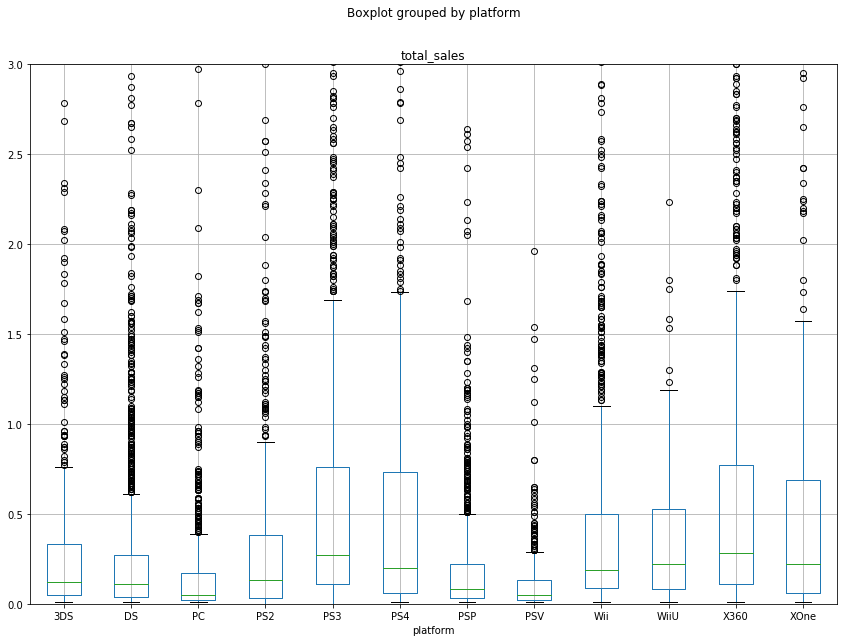

In [44]:
act_data.boxplot('total_sales', by='platform', figsize=(14,10))

plt.ylim(0,3)

На боксплотах можно увидеть 4 платформы с выделяющимися параметрами: XOne, X360, PS4 и PS3. У них самый большой размах 3-го квартиля и скошеннось датасета вправо. это значит, что у игр на этих консолях чаще всего высокие продажи, а значит и больше вероятность сорвать куш. Собственно, это и подкрепляет наши выводы выше: учитывая, что PS3 и X360 заканчивают свой жизненный цикл, **PS4 и XOne** являются самыми перспективными платформами на рынке.

Черные точки - выбросы, они выходят за рамки 1,5- квартильного размаха, то есть это просто игры, у которых выдались статистически ненормальные большие продажи. Визуально "выстрелов" много у всех платформ, кроме WiiU.

Теперь посмотрим, как в ретроспективе влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Возьмем для примера как раз Wii, которая в начале акутального периода была самой популярной и потом резко скатилась в 0. А также для сравнения еще добавим X360 и PS3 как успешные образцы.

Зависимость продаж от отзывов критиков для платформ Wii, X360 и PS3


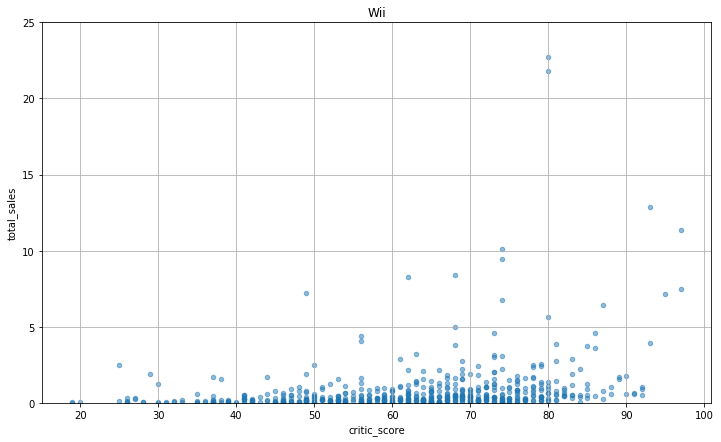

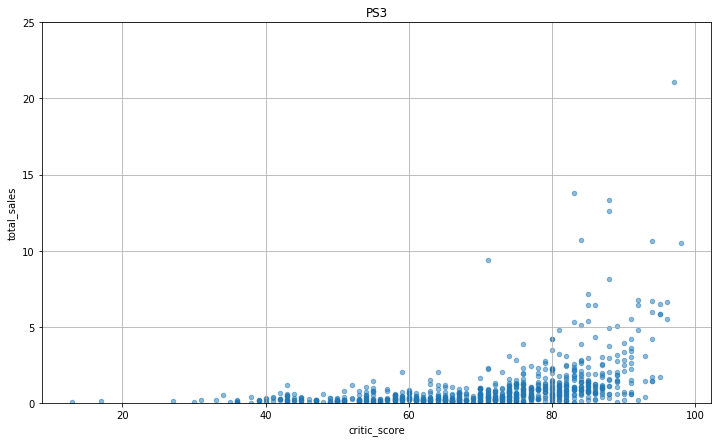

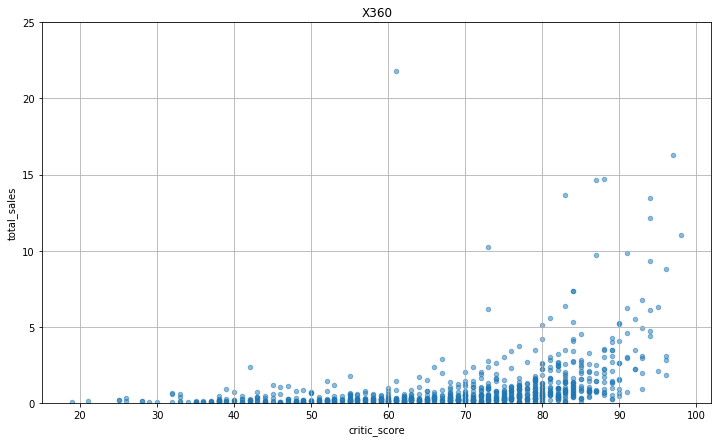

'Корреляция продаж у Wii с отзывами пользователей: '

0.11346698504557014

'Корреляция продаж у X360 с отзывами пользователей: '

0.11505880201124136

'Корреляция продаж у PS3 с отзывами пользователей: '

0.12680385547618966

In [45]:
#график
sample = ['Wii', 'PS3', 'X360']
print('Зависимость продаж от отзывов критиков для платформ Wii, X360 и PS3')
for row in sample:
    act_data.query('platform == @row').plot(x='critic_score', y='total_sales', kind='scatter',figsize=(12,7), ylim=(0,25), grid=True,alpha=0.5, title=row)
    plt.show()
    
#и корреляция
Wii_sales = act_data.query('platform=="Wii"')
X360_sales = act_data.query('platform=="X360"')
PS3_sales = act_data.query('platform=="PS3"')
display('Корреляция продаж у Wii с отзывами пользователей: ', Wii_sales['user_score'].corr(Wii_sales['total_sales']))
display('Корреляция продаж у X360 с отзывами пользователей: ', X360_sales['user_score'].corr(X360_sales['total_sales']))
display('Корреляция продаж у PS3 с отзывами пользователей: ', PS3_sales['user_score'].corr(PS3_sales['total_sales']))

Логично предположить, что чем выше оценка, тем больше должны быть продажи, и наоборот. Поэтому в идеальной ситуации точки, стремясь к максимальному значению 100 баллов, должны "подлетать" от оси Х и формировать "горку". 

Хотя расчет корреляции показывает очень слабую связь, визуально здесь наблюдается следующая вещь: оценки для PS3 и X360 навскидку такой график и формируют: примерно от оценки в 80 баллов, продажи игр начинают расти. А у Wii такой зависимости не наблюдается, точки как-будто равномерно распределены по нижней оси. Складывается впечатление, что на этой платформе могла одинакого "выстрелить" игра как с оценкой 60, так и с 90. То есть оценка критиков на продажи влияет намного меньше, чем у классики PS3 и X360, что делает (делало) платформу менее предсказуемой в части коммерческого успеха: видимо геймерам могла "зайти" игра как сделанная на коленке, так и с огромным бюджетом, что конечно повлияло на такое резкое угнетение платформы.

Для дальнейшего анализа пользовательских предпочтений переназначим начало актуального периода с 2006 года на 2012, когда бум продаж стабилизировался и в этом периоде были только свежие запросы геймеров.

In [46]:
act_data = data.query('year_of_release >= 2012')

И проанализируем влияние пользовательских оценок на продажи, тут возьмем для анализа уже PS4 и XOne.

Зависимость продаж от оценок пользователей для платформ XOne и PS4


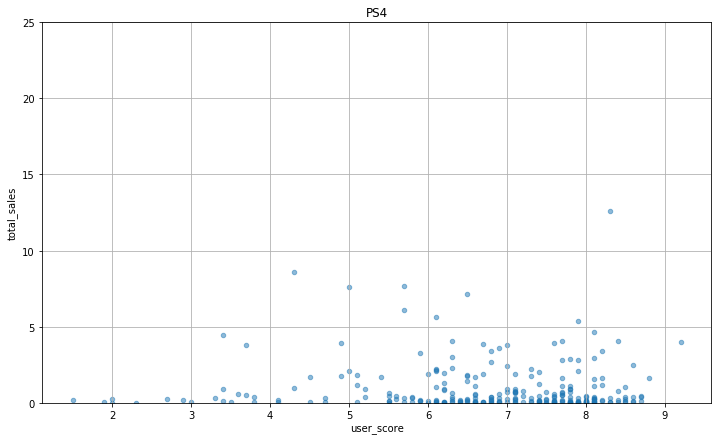

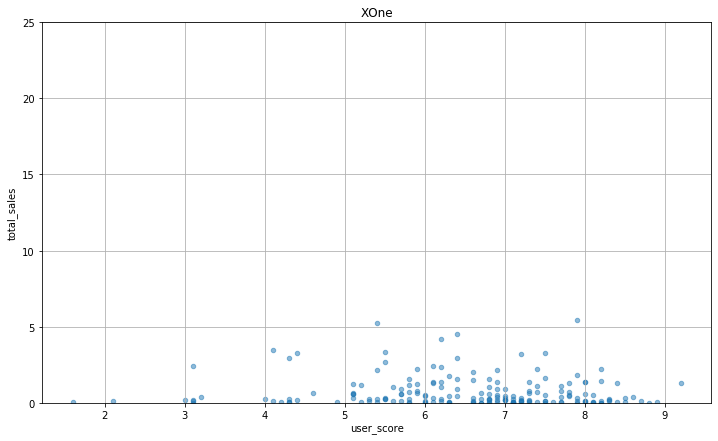

'Корреляция продаж у PS4 с отзывами пользователей: '

-0.031957110204556424

'Корреляция продаж у PS4 с отзывами пользователей: '

-0.06892505328279414

In [47]:
#построим графики
sample = ['PS4', 'XOne']
print('Зависимость продаж от оценок пользователей для платформ XOne и PS4')
for row in sample:
    act_data.query('platform == @row').plot(x='user_score', y='total_sales', kind='scatter',figsize=(12,7), ylim=(0,25), grid=True,alpha=0.5, title=row)
    plt.show()
    
#и посчитаем корреляцию
PS4_sales = act_data.query('platform=="PS4"')
XOne_sales = act_data.query('platform=="XOne"')
display('Корреляция продаж у PS4 с отзывами пользователей: ', PS4_sales['user_score'].corr(PS4_sales['total_sales']))
display('Корреляция продаж у PS4 с отзывами пользователей: ', XOne_sales['user_score'].corr(XOne_sales['total_sales']))

Что касается зависимости пользовательских оценок с продажами, то ни графически, ни математически связь не прослеживается. Одинаково выстрелить могут игры, как с ужасными оценками, так и с очень высокими, и наоборот. Поэтому полагаться на этот показатель не стоит.

Далее посмотрим, какие жанры были наиболее успешными в актуальны период.

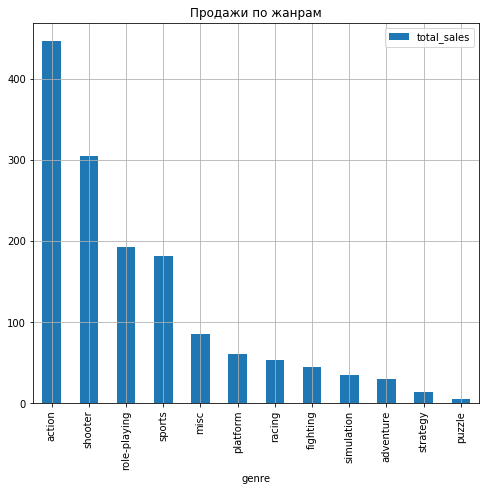

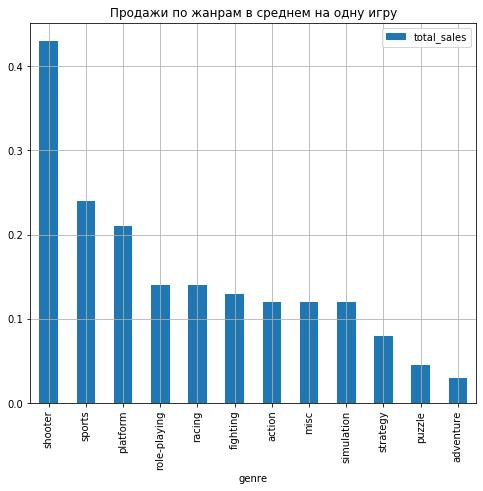

In [48]:
act_data.pivot_table(index='genre', 
                     values='total_sales', 
                     aggfunc='sum').sort_values(
                                    by='total_sales', 
                                    ascending=False).plot(y='total_sales', kind='bar', 
                                                          figsize=(8,7), grid=True,
                                                         title='Продажи по жанрам')
plt.show()

#также посмотрим на среднюю прибыль с одной игры
act_data.pivot_table(index='genre', 
                     values='total_sales', 
                     aggfunc='median').sort_values(
                                    by='total_sales', 
                                    ascending=False).plot(y='total_sales', kind='bar', 
                                                          figsize=(8,7), grid=True,
                                                         title='Продажи по жанрам в среднем на одну игру')
plt.show()

Очевидный топ-5 жанров, который выделяется на фоне других:
- экшн
- RPG (ролевая)
- шутер
- спорт
- misc (смесь нескольки жанров)

Замыкают статстику жанры Приключения, Стратегия и Паззл.

Чтобы закрепить эти выводы, следует дополнительно посмотреть на средние продажи с одной игры. И в приницпе эти жанры остались примерно на тех же местах, однако на 3-е место выбился жанр Платформа. Это означает, что игр с этим жанром было выпущено относительно немного, однако они показали коммерческий успех практически лучше других жанров. Поэтому при формировании стратегии следует учесть и этот жанр тоже.

Общий вывод по разделу:
Был выделен актуальный период и проведен анализ продаж в нем. Самыми перспективными платформами оказались PS4 и XOne, а из жанров Экшн, Спорт, Шутер, РПГ, Платформа и Misc. 

## Составление портрета пользователя

Определим для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5). Опишем различия в долях продаж.
- Самые популярные жанры (топ-5).
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [49]:
regions = ['na_sales','eu_sales', 'jp_sales']

#найдем топ5 в платформах
for row in regions:
    platform_region = act_data.pivot_table(index='platform', values=row, aggfunc='sum').sort_values(by=row, ascending=False)
    platform_region['share'] = platform_region[row] / platform_region[row].sum()
    display(platform_region.head().style.format({'share':"{0:.2%}"}))

,na_sales,share
platform,,
X360,140.57,23.69%
PS4,108.74,18.33%
PS3,103.74,17.49%
XOne,93.12,15.70%
3DS,55.49,9.35%


,eu_sales,share
platform,,
PS4,141.09,27.71%
PS3,107.27,21.07%
X360,74.89,14.71%
XOne,51.59,10.13%
3DS,42.83,8.41%


,jp_sales,share
platform,,
3DS,87.81,45.54%
PS3,35.29,18.30%
PSV,21.04,10.91%
PS4,15.96,8.28%
WiiU,13.01,6.75%


Рынок Америки и Европы очень схож: топ4 рынка делят X-Box и Playstation в различных девиациях. Причем PS4, некстген, который мы выделяли в прошлом разделе, очень хорошо набирает ход, забравшись на 2 и 1 место соответственно, а темпы XOne не такие высокие.

А в Японии совершенно другая картина. Видимо домашний рынок оказывает очень большое влияние, поэтому в топ5 находятся только японские произовдители: первое место занимает Nintendo со своим 3DS, следующие 3 консоли в списке идут от Sony (PS3, PSV, PS4), замыкает пятерку Nintendo Wii. Особенно интересно тут наблюдать преобладание на рынке портативних консолей (3DS и PSV). 

ТОП-5 Жанров по Регионам


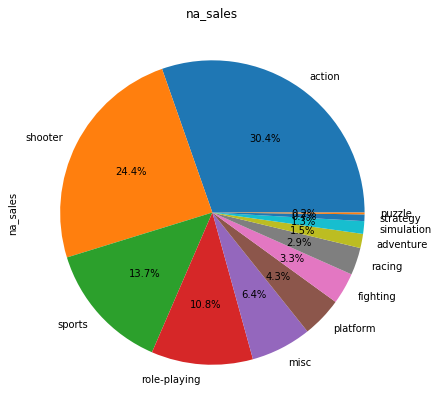

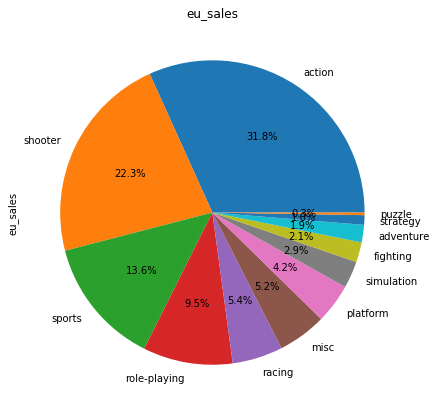

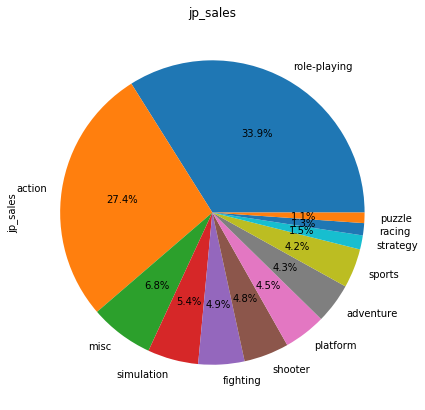

In [50]:
#теперь топ5 в жанрах
print('ТОП-5 Жанров по Регионам')
for row in regions:
    act_data.pivot_table(index='genre', 
                         values=row, 
                         aggfunc='sum').sort_values(by=row, ascending=False).plot(y=row, 
                                                                                  kind='pie',
                                                                                  figsize=(8,7), 
                                                                                  title=row,
                                                                                 legend=False, 
                                                                                 autopct='%1.1f%%')
    plt.show()

Выделили топ-5 жанров по регионам: в Северной Америке и Европе вкусы пользователей практически идентичны: экшн,  шутеры, спорт, рпг, а Топ-5 замыкает микс и гонки соответственно. 

В Японии же все по-другому: здесь 1/3 рынка занимает РПГ, если прибавить экшн, то они на двоих займут почти 2/3. Далее идет практически все остальное с небольшой разницей, формально это микс, симулятор и файтинг. 

Теперь попробуем обнаружить влияние рейтинга ESRB на продажи в регионах.

Средние продажи в зависимости от рейтинга


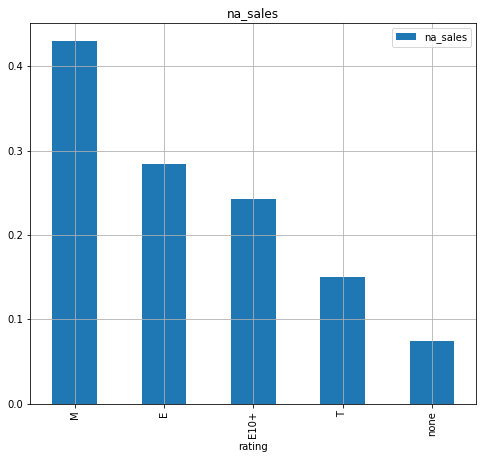

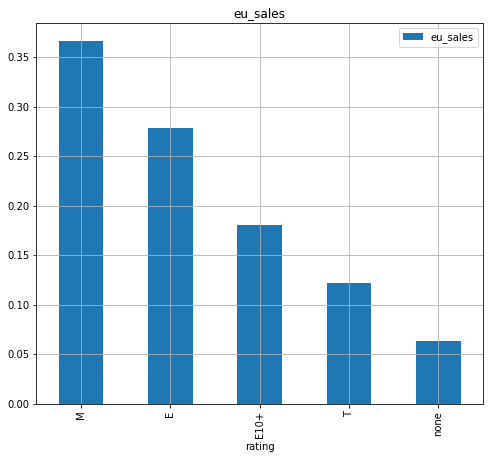

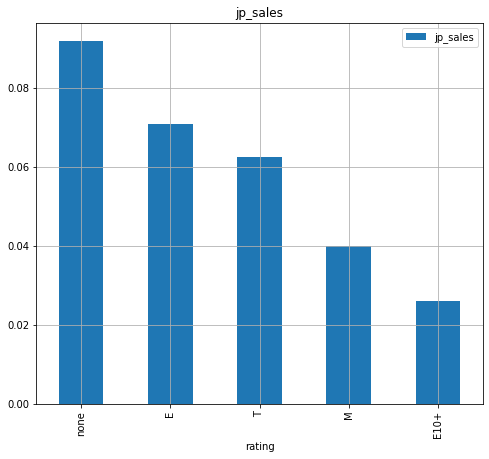

Игр всего:  2900
Игр без рейтинга:  1124


In [57]:
act_data.loc[act_data['rating'].isna(), 'rating'] = 'none'

print('Средние продажи в зависимости от рейтинга')
for row in regions:
    act_data.pivot_table(index='rating', 
                     values=row, 
                     aggfunc='mean').sort_values(
                                    by=row, 
                                    ascending=False).plot(y=row, kind='bar', 
                                                          figsize=(8,7), grid=True,
                                                         title=row)
    plt.show()
print('Игр всего: ', len(act_data))
print('Игр без рейтинга: ', len(act_data[act_data['rating'] == 'none']))

Из получившихся графиков сложно сделать достойные выводы, т.к. у трети игр отсутствует рейтинг, и выборка от этого страдает. Но все же можно отметить схожесть рынков Америки и Европы: игры с рейтингом Mature (17+) в среднем получают больше продаж в регионе. А в Японии лучшее среднее у Everyone (6+) и Teen (13+). Это может означать преобладание молодежи и детей в целевой аутидории пользователей видеоигр, а также может быть японцам просто больше нравятся нежестокие игры.

Тажке бросается в глаза, что в Японии топ продаж занимают игры без рейтинга. Возможно ли это локальные игры? Проверим.

In [61]:
#выделим игры, у которых продажи были только в Японии
act_data.query('jp_sales > 0 & na_sales == 0 & eu_sales == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
385,Monster Hunter 4,3DS,2013.0,role-playing,0.0,0.0,3.44,0.0,NaN,NaN,none,3.44
562,Yokai Watch 2 Shinuchi,3DS,2014.0,role-playing,0.0,0.0,2.68,0.0,NaN,NaN,none,2.68
690,Yokai Watch Busters,3DS,2015.0,action,0.0,0.0,2.29,0.0,NaN,NaN,none,2.29
1238,Puzzle & Dragons,3DS,2013.0,role-playing,0.0,0.0,1.51,0.0,NaN,NaN,none,1.51
1459,Yokai Watch 3,3DS,2016.0,action,0.0,0.0,1.33,0.0,NaN,NaN,none,1.33
...,...,...,...,...,...,...,...,...,...,...,...,...
16555,Strawberry Nauts,PSV,2016.0,adventure,0.0,0.0,0.01,0.0,NaN,NaN,none,0.01
16559,Aiyoku no Eustia,PSV,2014.0,misc,0.0,0.0,0.01,0.0,NaN,NaN,none,0.01
16562,Samurai Warriors: Sanada Maru,PS3,2016.0,action,0.0,0.0,0.01,0.0,NaN,NaN,none,0.01
16564,Haitaka no Psychedelica,PSV,2016.0,adventure,0.0,0.0,0.01,0.0,NaN,NaN,none,0.01


Предположение оказалось верным: 858 игр без рейтинга из 1124 - это игры, выпущенные только на рынок Японии, поэтому у них нет рейтинга ESRB, т.к. его просто не потребовалось устанавливать. Посмотрим распределение платформ у них.

In [62]:
act_data.query('jp_sales > 0 & na_sales == 0 & eu_sales == 0')['platform'].value_counts()

PSV     255
3DS     195
PSP     169
PS3     154
PS4      51
WiiU     14
X360      7
Wii       7
DS        5
XOne      1
Name: platform, dtype: int64

Большинство этих игр были выпущены на портативные консоли и на умирающую PS3 и всего 51 штука на PS4. Поэтому рынок внутренних игр в японском регионе оказывается большой, но к сожалению, он без потенциала в будущем.

Общий вывод по разделу.

Рынки Северной Америки и Европы очень схожи: там пользователь скорее всего сидит на X-Box и Playstation, любит экшн, шутеры, спорт, рпг, и заходят ему лучше всего игры со взрослым рейтингом Mature (17+).

Рынок Японии кардинально отличается: у пользователя консоль от местных Sony или Nintendo, скорее всего портативная, любит он преимущественно РПГ или экшн, а рейтинг игр Everyone (6+) и Teen (13+). Плюс отмечается наличие локальных игр без рейтинга, однако потенциала у них нет, т.к. большинство было выпущено на портативные платформы, у которых прошел пик жизненного цикла. 

## Проверка гипотез

В этом разделе проверим следующие гипотезы:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Значение alpha возьмем стандартное 0.05

Проверим первую гипотезу. 

Нулевая гипотеза Н0: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

Альтернативная гипотеза Н1: "Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые"

In [63]:
#дополнительно очистим от пропусков образцы для корректных вычислений
sample_1 = act_data.query('platform == "XOne"')['user_score'].dropna()
sample_2 = act_data.query('platform == "PC"')['user_score'].dropna()

alpha = 0.05
results = st.ttest_ind(sample_1, sample_2)

print('p-значение: {:.10f}'.format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.6252774522
Не получилось отвергнуть нулевую гипотезу


**Вывод**:оснований отвергать утверждение, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, нет . Платформы абсолютно разные (интерфейс, способ управления, производительность), однако оценка пользователей очень схожа. Вероятно, игры делают с одинаковым качеством на ПК и XOne, стараясь не ущемлять пользователей компьютеров, несмотря на большое распространение там пиратства.

Проверим вторую гипотезу. 

Нулевая гипотеза Н0: "Средние пользовательские рейтинги жанров Action и Sports одинаковые"

Альтернативная гипотеза Н1: "Средние пользовательские рейтинги жанров Action и Sports не одинаковые"

In [64]:
sample_3 = act_data.query('genre == "action"')['user_score'].dropna()
sample_4 = act_data.query('genre == "sports"')['user_score'].dropna()

alpha = 0.05
results = st.ttest_ind(sample_3, sample_4)

print('p-значение: {:.10f}'.format(results.pvalue))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.0000000000
Отвергаем нулевую гипотезу


**Вывод**: утверждение, что средние пользовательские рейтинги жанров Action и Sports одинаковые, очень маловероятно.

 ## Общий вывод


После анализа датасета из открытых источников можно акцентировать внимание для формирования кампании на 2017 год в следующих направлениях:
- платформы с наибольшим потенциалом: XOne и PS4. А портативные консоли уже не обладают потенциалом, пройдя свои пики жизненного цикла. Основываясь на ретроданных, есть смысл в них вкладываться при выпуске новой модели от флагмана сегмента Nintendo.
- стратегия для рынка Европы и Америки общая (очень схожие регионы):
    - внимание можно уделить больше PS4, т.к. она уже отвоевала бОльшую часть рынка
    - упор на жанры экшн, шутеры, спорт, рпг
    - рейтинг для игры ESRB Mature (17+) является приоритетным
- стратегия для Японии: 
    - рынок не такой объемный и в нем преобладают игры на портативных консолях, которые переживают спад, поэтому долю расходов на маркетинг на него следует сделать меньше
    - исключить из кампании платформу Xone, т.к. она там непопулярная
    - приоритет для жанров: РПГ и экшн
    - приоритетный рейтинг для игры Everyone (6+) и Teen (13+)
- общее дополнение к жанру: рассмотреть интересные игры-платформы, т.к. их выпускается немного, но средние продажи с одной выбиваются в топы